In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('mtcars.csv')
df = df.sample(frac = 1, random_state = 3)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


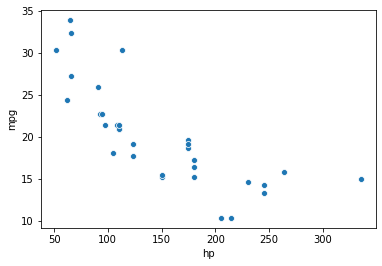

In [7]:
sns.scatterplot(x = 'hp', y = 'mpg', data = df)

In [8]:
df['hp'].describe()

count     32.000000
mean     146.687500
std       68.562868
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      335.000000
Name: hp, dtype: float64

In [27]:
q1 = df['hp'].quantile(0.25)
q2 = df['hp'].quantile(0.5)
q3 = df['hp'].quantile(0.75)

def hp_cat(hp):
    if hp <= q1:
        return 'low hp'
    elif q1 < hp <= q2:
        return 'medium hp'
    elif q2 < hp <= q3:
        return 'high hp'
    else:
        return 'very high hp'
    

In [28]:
df['hp_cat'] = df['hp'].apply(hp_cat)


In [42]:
df = df.sort_values(by = 'hp')

In [43]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,hp_cat,mpg_cat
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,low hp,very high
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,low hp,very high
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,low hp,very high
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,low hp,very high
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,low hp,very high


In [44]:
df.groupby('hp_cat')['hp'].agg(['min', 'max', 'count'])

,min,max,count
hp_cat,,,
high hp,150,180,8
low hp,52,95,8
medium hp,97,123,9
very high hp,205,335,7


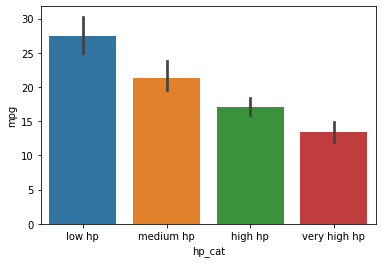

In [45]:
sns.barplot(x = 'hp_cat', y = 'mpg', data = df)

In [36]:
q1 = df['mpg'].quantile(0.25)
q2 = df['mpg'].quantile(0.5)
q3 = df['mpg'].quantile(0.75)

def mpg_cat(mpg):
    if mpg <= q1:
        return 'low'
    elif q1 < mpg <= q2:
        return 'medium'
    elif q2 < mpg <= q3:
        return 'high'
    else:
        return 'very high'

In [37]:
df['mpg_cat'] = df['mpg'].apply(mpg_cat)

In [ ]:
df =

In [38]:
df.groupby('mpg_cat')['mpg'].agg(['min', 'max', 'count'])

,min,max,count
mpg_cat,,,
high,19.7,22.8,8
low,10.4,15.2,8
medium,15.5,19.2,9
very high,24.4,33.9,7


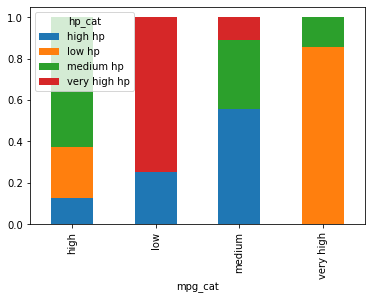

In [39]:
ct = pd.crosstab(df['mpg_cat'], df['hp_cat'], normalize = 0)
ct.plot.bar(stacked = True)